In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Tcs\Downloads\advertising.csv')
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


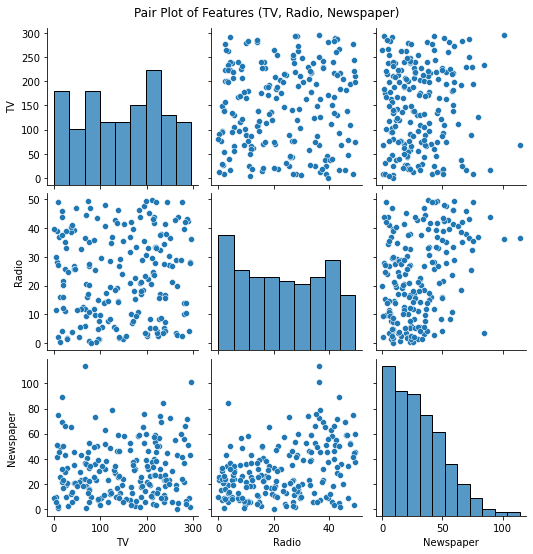

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
print(df.isnull().sum())
print(df.dtypes)
features=df[['TV', 'Radio', 'Newspaper']]
target = df['Sales']
sns.pairplot(features)
plt.suptitle("Pair Plot of Features (TV, Radio, Newspaper)", y=1.02)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)
print(f"Trainng features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")

Trainng features shape: (160, 3)
Test features shape: (40, 3)
Training target shape: (160,)
Test target shape: (40,)


Mean Squared Error on test data: 2.908
R^2 Score on test data: 0.906


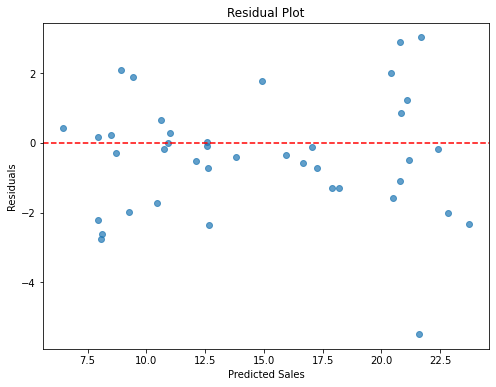

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr_model  = LinearRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error on test data: {mse:.3f}")
print(f"R^2 Score on test data: {r2:.3f}")
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear_regression', LinearRegression())
])


poly_pipeline.fit(X_train, y_train)

y_pred_poly = poly_pipeline.predict(X_test)


mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (degree=2) Mean Squared Error: {mse_poly:.3f}")
print(f"Polynomial Regression (degree=2) R^2 Score: {r2_poly:.3f}")


Polynomial Regression (degree=2) Mean Squared Error: 1.443
Polynomial Regression (degree=2) R^2 Score: 0.953


In [8]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),           
    ('svr', SVR(kernel='rbf'))               
])
svr_pipeline.fit(X_train, y_train)
y_pred_svr = svr_pipeline.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR (RBF kernel) Mean Squared Error: {mse_svr:.3f}")
print(f"SVR (RBF kernel) R^2 Score: {r2_svr:.3f}")


SVR (RBF kernel) Mean Squared Error: 4.421
SVR (RBF kernel) R^2 Score: 0.857


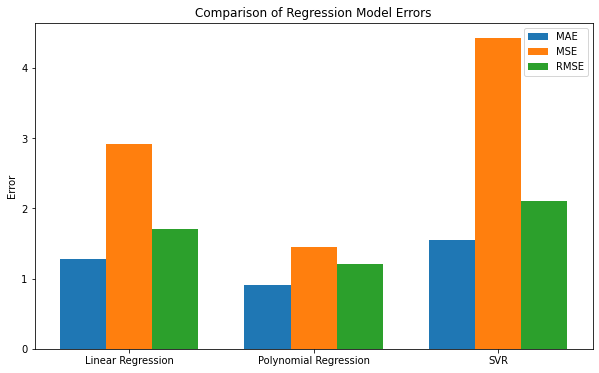

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

models = ['Linear Regression', 'Polynomial Regression', 'SVR']

mae = [
    mean_absolute_error(y_test, y_pred),            
    mean_absolute_error(y_test, y_pred_poly),      
    mean_absolute_error(y_test, y_pred_svr)         
]

mse = [
    mean_squared_error(y_test, y_pred),
    mean_squared_error(y_test, y_pred_poly),
    mean_squared_error(y_test, y_pred_svr)
]

rmse = [np.sqrt(e) for e in mse]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width, mae, width, label='MAE')
ax.bar(x, mse, width, label='MSE')
ax.bar(x + width, rmse, width, label='RMSE')

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylabel('Error')
ax.set_title('Comparison of Regression Model Errors')
ax.legend()

plt.show()


In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 3,random_state=42)
kmeans.fit(features)
cluster_labels = kmeans.labels_
df['Cluster'] = cluster_labels
print(df.head())

      TV  Radio  Newspaper  Sales  Cluster
0  230.1   37.8       69.2   22.1        0
1   44.5   39.3       45.1   10.4        1
2   17.2   45.9       69.3   12.0        1
3  151.5   41.3       58.5   16.5        2
4  180.8   10.8       58.4   17.9        2


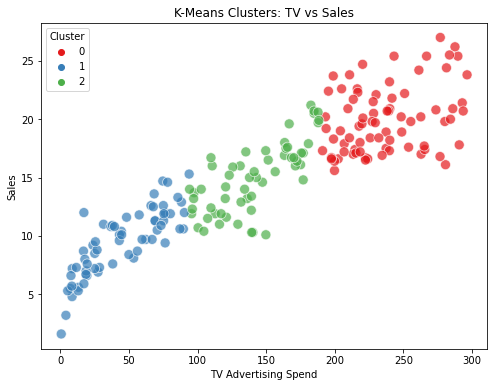

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='TV', y='Sales', hue = 'Cluster', palette='Set1',s=100,alpha=0.7)
plt.title('K-Means Clusters: TV vs Sales')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.legend(title='Cluster')
plt.show()